In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("VEZC Startadministratie export (moritz).csv")
print(df.columns)

Index(['PILOTLOG_DATE', 'AF_DEP', 'AF_ARR', 'TIME_TOTAL', 'TIME_PIC',
       'TIME_INSTRUCTOR', 'TIME_DEP', 'TIME_ARR', 'AC_MODEL', 'AC_VARIANT',
       'AC_REG', 'PILOT1_NAME', 'PILOT2_NAME', 'GLIDERLAUNCH', 'REMARKS'],
      dtype='object')


In [10]:
df.describe()

,PILOTLOG_DATE
count,1.920000e+02
mean,2.021322e+07
std,1.215663e+04
min,2.020061e+07
25%,2.020101e+07
50%,2.021091e+07
75%,2.022110e+07
max,2.023071e+07


In [12]:
df_acmodel = df.groupby('AC_MODEL', as_index=True)['AF_DEP'].count().sort_values(ascending=False)
print(df_acmodel)

AC_MODEL
ASK 21            112
LS 4-b             54
Duo Discus         20
Discus CS           3
ASK 13              1
Nimbus 3DT          1
T.21B Sedbergh      1
Name: AF_DEP, dtype: int64


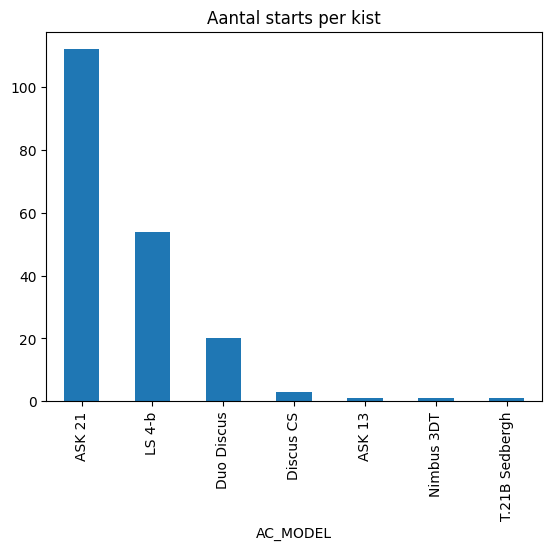

In [13]:
df_acmodel.plot(kind='bar', title="Aantal starts per kist")
plt.show()

In [14]:
df['TIME_TOTAL'] = pd.to_datetime(df['TIME_TOTAL'], format='%H:%M')

In [15]:
# Calculate the total hours flown
min_time = df['TIME_TOTAL'].min()
df['total_hours'] = (df['TIME_TOTAL'] - min_time).dt.total_seconds() / 3600

# Print the total hours flown
print(df['total_hours'])

0      0.616667
1      0.066667
2      0.100000
3      0.016667
4      0.133333
         ...   
187    0.983333
188    1.200000
189    0.333333
190    0.216667
191    0.566667
Name: total_hours, Length: 192, dtype: float64


In [17]:
grouped_hours = df.groupby('AC_MODEL')['total_hours'].sum()
print(grouped_hours)

AC_MODEL
ASK 13             0.150000
ASK 21            27.266667
Discus CS          0.783333
Duo Discus         7.950000
LS 4-b            15.800000
Nimbus 3DT         4.550000
T.21B Sedbergh     0.116667
Name: total_hours, dtype: float64


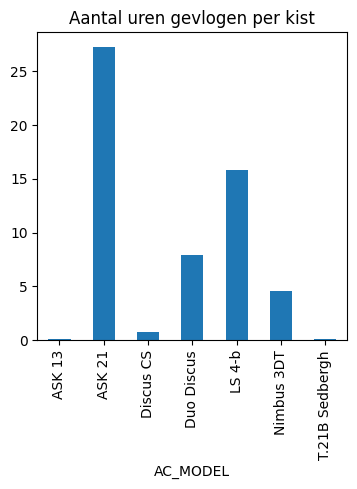

In [18]:
plt.figure(figsize=(4, 4))
grouped_hours.plot(kind='bar', title="Aantal uren gevlogen per kist")
plt.show()

In [19]:
filtered_df = df[(df['PILOT1_NAME'] == 'Moritz Rijnbende') & df['PILOT2_NAME'].isna()]


In [21]:
starts_sum = filtered_df.groupby('AC_MODEL')['AF_DEP'].count()
print(starts_sum)

AC_MODEL
ASK 21       24
Discus CS     3
LS 4-b       54
Name: AF_DEP, dtype: int64


In [23]:
hours_sum = filtered_df.groupby('AC_MODEL')['total_hours'].sum()
print(hours_sum)


AC_MODEL
ASK 21        3.933333
Discus CS     0.783333
LS 4-b       15.800000
Name: total_hours, dtype: float64


<AxesSubplot: title={'center': 'Aantal uren per kist solo'}, xlabel='AC_MODEL'>

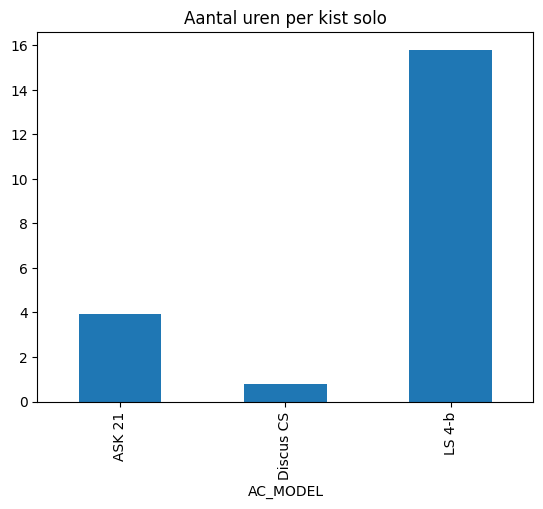

In [24]:
hours_sum.plot(kind="bar", title="Aantal uren per kist solo")

In [25]:
filtered_df_dbo = df[(df['PILOT1_NAME'] == 'Moritz Rijnbende') & df['PILOT2_NAME'].notna()]


In [27]:
starts_sum_dbo = filtered_df_dbo.groupby('AC_MODEL')['AF_DEP'].count()
print(starts_sum_dbo)

AC_MODEL
ASK 21        84
Duo Discus    12
Name: AF_DEP, dtype: int64


In [28]:
hours_sum_dbo = filtered_df_dbo.groupby('AC_MODEL')['total_hours'].sum()
print(hours_sum_dbo)

AC_MODEL
ASK 21        22.683333
Duo Discus     5.800000
Name: total_hours, dtype: float64


<AxesSubplot: title={'center': 'Aantal uren per kist dbo'}, xlabel='AC_MODEL'>

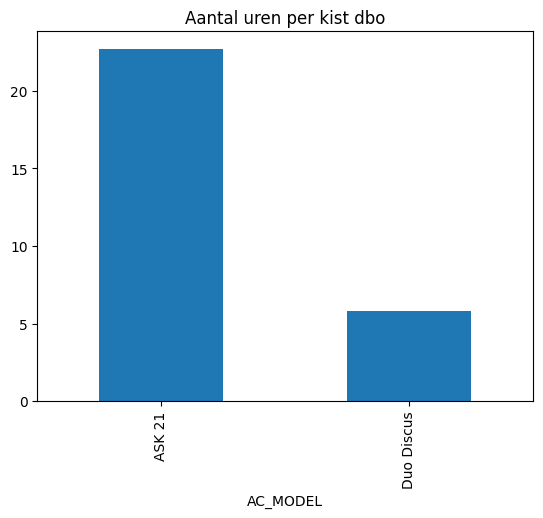

In [30]:
hours_sum_dbo.plot(kind="bar", title="Aantal uren per kist dbo")